In [39]:
###Set notebook preferences##
#Read in some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

#Set notebook preferences - pandas
pd.set_option("display.max_columns", 101)

#Set path to modeling folder
model_viz = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Modeling'

#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'


# Introduction

The world is urbanizing more and more every year. In fact, the United Nations predicts 70% of the world’s population will live in cities by 2050 ([source](https://www.un.org/development/desa/en/news/population/2018-revision-of-world-urbanization-prospects.html)). This is a marvelous feat for humanity as we continue to lift people out of poverty all across the world. However, urbanization is not without its costs and perhaps the most daunting problem to solve is the increase in demand for energy. 

At this time, electricity is mainly created using fossil fuels and natural gas. Though there are other environmentally friendly methods of energy production(other than nuclear), at this time electricity cannot itself be stored on any scale. There are some storage system methods available, however they are nowhere close capacity-wise to fuel a city. 

The future will certainly bring breakthroughs in energy production technology but until then, there is plenty of room to optimize energy production with the current methods we have. In this analysis, I will be investigating hourly energy data in Spain (01/01/2015 - 12/31/2018) to assist an energy supplier do just that. 

## Intent

The data contains hourly information about the generation, price, and demand of energy in Spain. Additionally, this data contains predictions for energy demand and prices made by Spain’s transmission system operator (TSO).

In this analysis, I will be creating a few time series models as well as a consumer  showcase a few models that outperforms the predictions the TSO made for hourly demand and the price of energy production. Once we have a better method to forecast energy demand and costs, we can help energy providers devise new energy production strategies that meet the needs of their consumers, lowers excess energy production thus saving cost and also explore ways to better integrate alternative green energy production methods. I will also look into consumer patterns of behaviors which can be used to help devise rebate programs to help reduce demand during forecasted peak times during the year.  

## Objectives

In this analysis, I will be conducting the following:

Model different consumer behaviors to create consumer profiles based on electricity demand using a clustering algorithm. I will extract times during the day they use power the most & least and try to draw additional insights about their behavior. Better understanding our consumers will allow us to devise rebate programs to incentivize consumers to limit power usage during specific times of the day/year when we forecast demand to be very high(helping energy production companies lower cost).

Creating a multivariate energy cost and demand predictors that will both surpasses previous TSO predictions in performance. Models will be able to make forecasts 3 months into the future. More specifically, models built were VAR, XGBRegressor, and a Deep Learning Network. Being able to forecast demand and cost will allow energy providers to devise production strategies that will limit costs, produce an optimal amount of energy and also leverage more green methods of production 


## Impact

The big picture impact of the analysis is to better develop ways to create cost efficient ways of energy production while also looking to incorporate green technology. By creating the right amount of energy, we protect the enviroment from harmful CO2 emissions as well as the bottomline of energy prodcution companies. If Spain is able to optimally produce electricity through the information we gained through the analysis, it stands to reason other nations can do the same. Thereby we can slowly work towards solving the energy crisis urbanization will certainly bring in the coming decades.

# Table of Contents

1. Introduction
     - Intent
     - Objectives
     - Impact
2. Table of Contents
3. Data Overview
    - About the Data
    - Preview Data
    - Data Overview - Metrics
4. Methodology
5. Consumer Profile Analysis
    - Results
6. Time Series Analysis
    - Results
7. Conclusion
    - Final Takeaways
    - Thoughts for future research

# Data Overview

## About the Data

Energy data contains hourly information about the generation of energy in Spain. In particular, there is info (in MW) about the amount of electricity generated by the various energy sources (fossil gas, fossil hard coal and wind energy dominate the energy grid), as well as about the total load (energy demand) of the national grid and the price of energy (€/MWh). Note: Since the generation of each energy type is in MW and the time-series contains hourly info, the number of each cell represent MWh.

Data source can be found [here](https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather).

## Preview Data

Below is a preview of the processed data. Data shape is 35,070 rows by 22 columns

In [40]:
#Read in data
data = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

#Preview
display(data.head())

,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,price_actual,price_day_ahead,temp,total_load_actual,total_load_forecast
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,17.0,6436.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,50.10,30.814633,25385.0,26118.0
2015-01-01 01:00:00,16.0,5856.0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,48.10,30.852860,24382.0,24934.0
2015-01-01 02:00:00,8.0,5454.0,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,47.33,30.108448,22734.0,23515.0
2015-01-01 03:00:00,2.0,5151.0,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,42.27,30.091044,21286.0,22642.0
2015-01-01 04:00:00,9.0,4861.0,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,38.41,30.192620,20264.0,21785.0


## Data Overview - Metrics

**Data Description**

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
forecast_solar_day_ahead,35070.0,1438.825121,1677.661532,0.000000,69.000,576.0000,2635.000,5836.0000
forecast_wind_onshore_day_ahead,35070.0,5471.372512,3176.148983,237.000000,2979.000,4855.5000,7353.000,17430.0000
generation_biomass,35070.0,383.536128,85.348006,0.000000,333.000,367.0000,433.000,592.0000
generation_fossil_brown_coal/lignite,35070.0,448.060251,354.603125,0.000000,0.000,509.0000,757.000,999.0000
generation_fossil_gas,35070.0,5622.474309,2201.444741,0.000000,4126.000,4969.0000,6428.750,20034.0000
generation_fossil_hard_coal,35070.0,4256.296179,1961.968024,0.000000,2527.000,4474.0000,5839.000,8359.0000
generation_fossil_oil,35070.0,298.335358,52.518153,0.000000,263.000,300.0000,330.000,449.0000
generation_hydro_pumped_storage_consumption,35070.0,475.867237,792.594472,0.000000,0.000,68.0000,617.000,4523.0000
generation_hydro_run-of-river_and_poundage,35070.0,972.117536,400.740520,0.000000,637.000,906.0000,1250.000,2000.0000
generation_hydro_water_reservoir,35070.0,2605.122241,1835.141359,0.000000,1077.250,2165.0000,3757.000,9728.0000


# Consumer Profile Analysis - Modeling Consumer Demand Patterns

## Methodology

I will be using a clustering algorithm to model different patterns of consumer behavior pertaining to energy demand. Using KMeans clustering, I will identify 3 unique profiles about our consumers' behaviors with the hopes of better understanding how demand could change based on the time of day or week. Demand for each cluster will be plotted across each hour of the day with the average for each cluster plotted as well

Clustering algorithm will be validated using the t-Distributed Stochastic Neighbor Embedding (t-SNE) technique

## Results

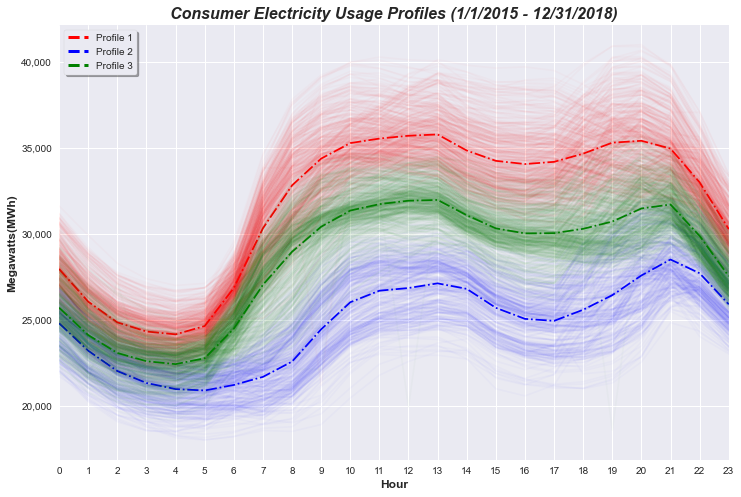

In [43]:
#Read in Silhouette_Scores
Image(filename= model_viz + '/Consumer_Energy_Profiles.png', height=700, width=700)

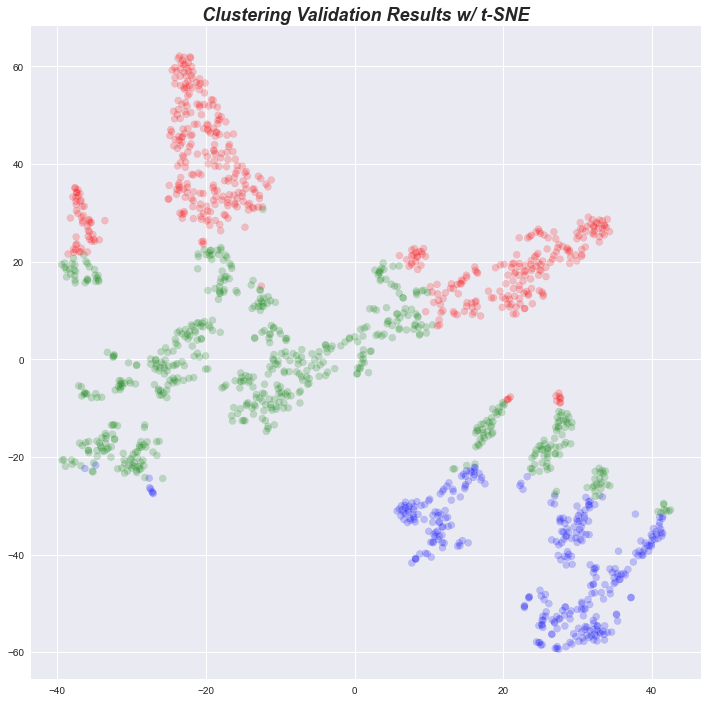

In [49]:
#Read in Silhouette_Scores
Image(filename= model_viz + '/t-SNE_results.png', height=500, width=500)

Looking at the results of our KMeans clustering algorithm, we were able to model 3 valid and unique patterns of energy usage with varying intensities of demand throughout each hour of the day.

Noteworthy similarities between profiles:
Some of the similarities between each profile are not all too surprising. Energy demand tend to decrease in the evening around 8-9pm and steadily decreases as the night goes on. We see rises in demand right around when most folks are waking up in the morning, though profile 1 has the slowest gradual increase of the 3. 

Unique attributes about profiles and possible meaning about consumer
**Profile 1**
Profile 1 appears to model consumer behavior during weekends and holidays. The slow rise in demand in the mornings relative to the other 2 profiles appears to indicate consumers are sleeping in without the pressure of getting ready for work. Reference boxplot below to see daily distributions of energy demand

Additionally, most folks will travel to visit otthers and thus homes tend to be empty and since most office buildings are closed, energy demands would be significantly lower. Peak demand is right around 9pm, generally a good time for socializing and attending entertainment events.   


Profile 2 could be profiles of individuals who are caretakers, elderly, and work/stay at home most. The curve is very similar to profile 3 and perhaps the matching behavrior with profile 3 in the morning could indicate preparing children for school

Profile 3 appears to be indicative of energy demand during working days. Energy demand would be highest during these times since office building require immense amount of energy (and sometimes stay on all-night).



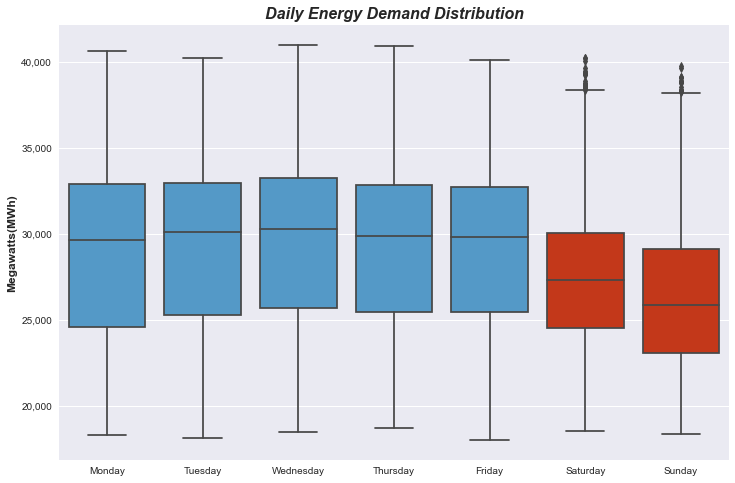

In [50]:
#Read in daily demand distributions
Image(filename= model_viz + '/Daily_Demand.png', height=200, width=700)

## Decision Recommendations - Consumer/Employer Rebate Program

Based on the data we have, there is a case that can be made about incentivizing office building to install energy saving technology such as motion sensors and energy sabing bulbs to dim/shutoff lights when they are not in use. Additionally, if we could also incentivize employers to consider allow working from home to be an option(at least for a day a week), the savings on energy production would be astounding.



# Multivariate Time Series Analysis - Forecasting Energy Production costs

## Methodology

I built a mulitvariate time series model to better predict and forecast energy productions costs. The goal was to surpass predictions made by the TSO by leveraging lag values and production features present in the data. After building the model, I did a cost-benefit analysis, looking at how much money could be saved by using an updated model for the duration of the forecast().

## Original TSO Forecast 

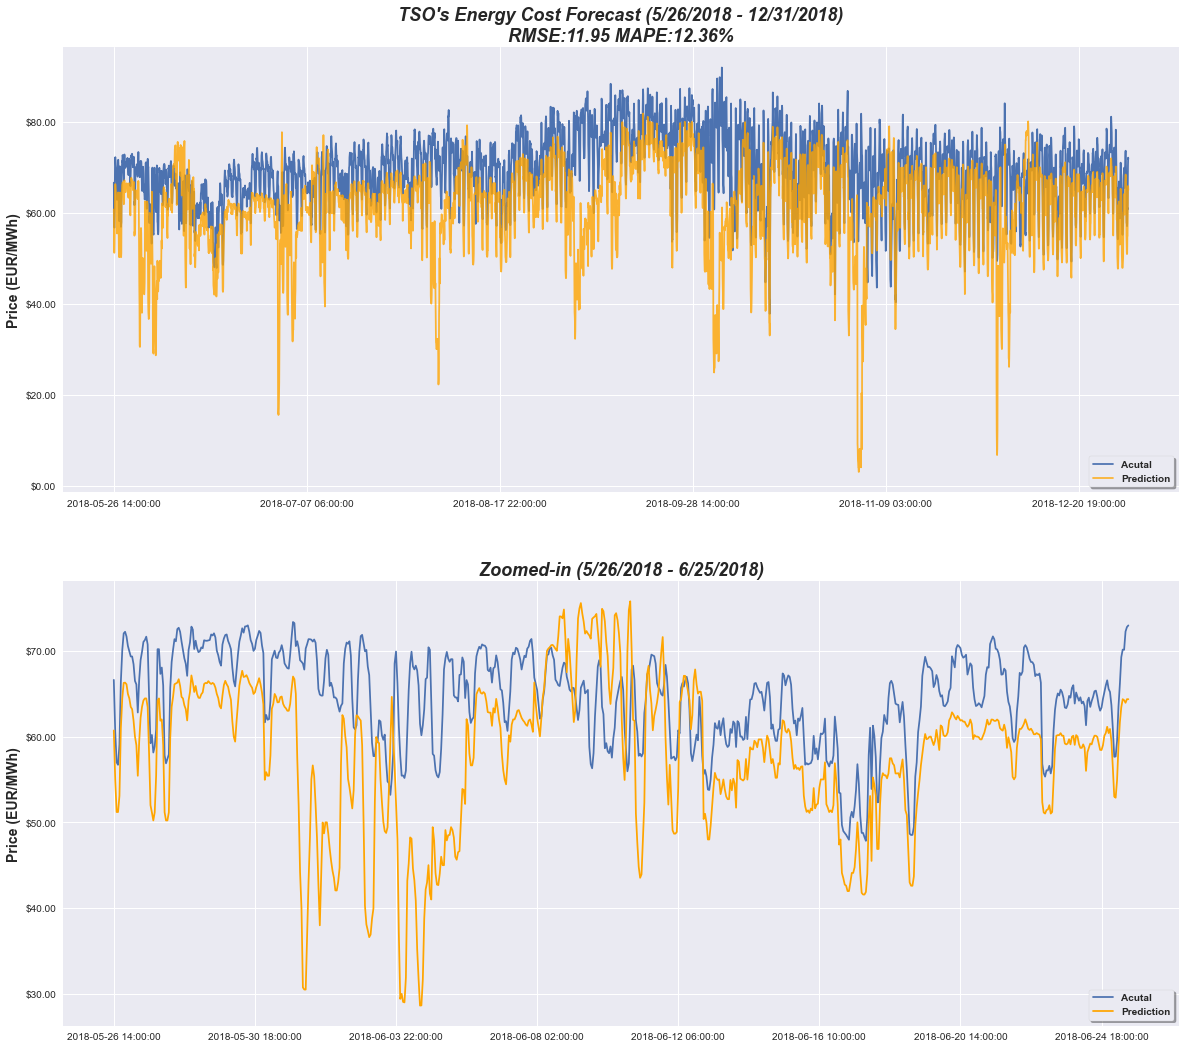

In [45]:
#Read in TSO_Cost_Predictions model
Image(filename= model_viz + '/TSO_Cost_Predictions.png', height=700, width=1400)

The primary issue of the TSO model is that it tends to underestimate and struggles to capture the nuances of cost. It appears to be based on historical data, however energy demand has been slowly increasing during the duration of this data set, particularly in 2018

## Mulitvariate XGBRegressor Forecast

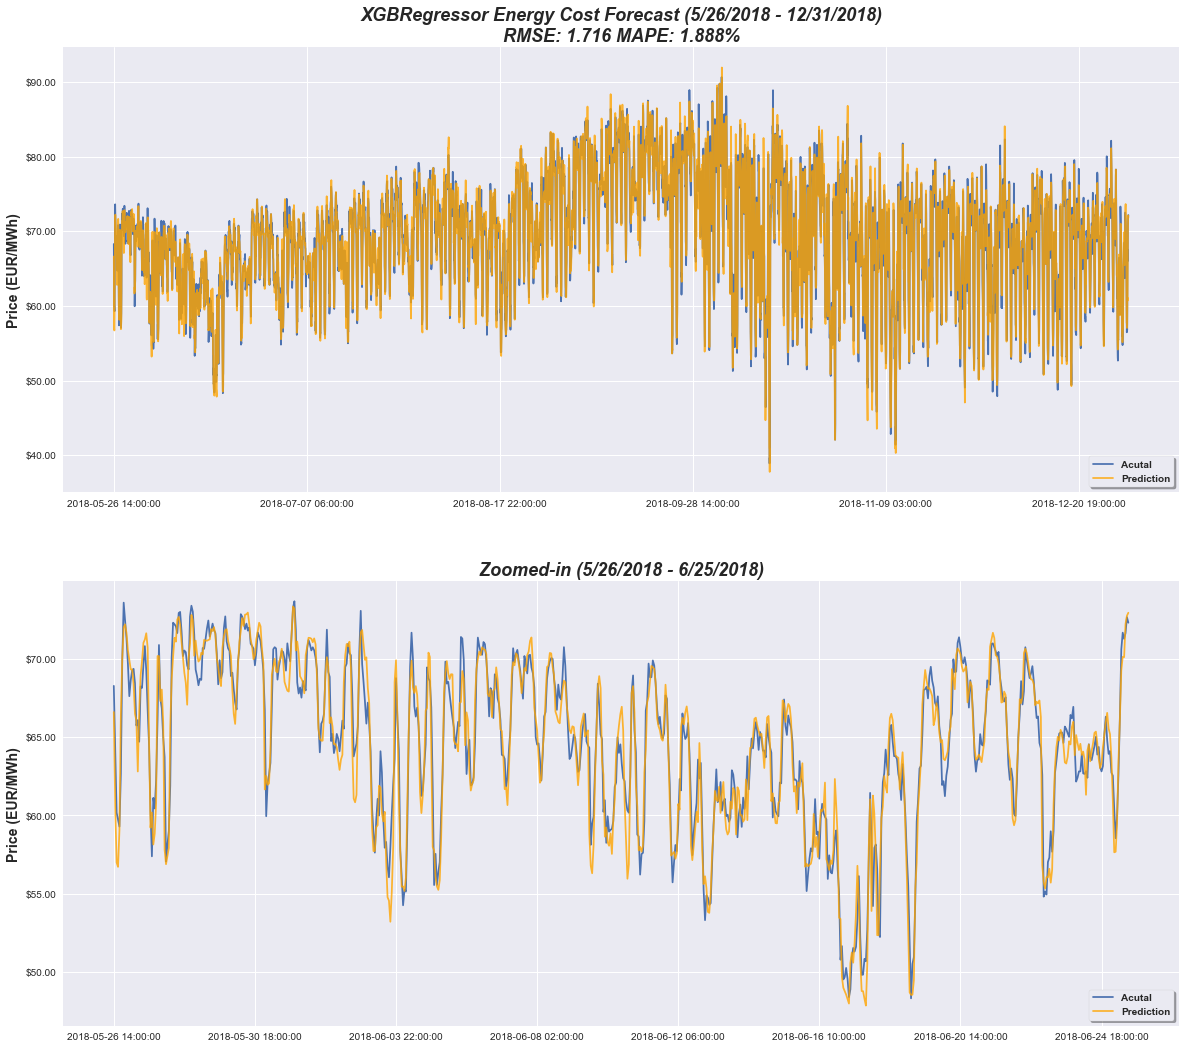

In [46]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/XGBR_Cost_Predictions.png', height=700, width=1400)

The XGBRegressor easily outperformed the TSO model, mostly because it is able to incorporate the different energy production features as well as time lagged features of previous energy demand values. Because of this, the XGBRegressor is able to capture the increasing variance of energu demand, particularly in later 2018.

## Decision Recommendations - Projected Savings with new Cost model

The error metrics of the original TSO model forecasts from 5/26/2018 - 12/31/2018 are as follows:
- **Total Error**: \\$41,595.38
- **Average Daily Error**: \\$7.90
- **Average Hourly Error**: \\$7.91

The error metrics of the XGBRegressor model forecasts from 5/26/2018 - 12/31/2018 are as follows:
- **Total Error**: \\$134.00
- **Average Daily Error**: \\$.02
- **Average Hourly Error**: \\$.03

The new cost model stands to save the energy production company \\$41,461.38 over a roughly 6-month period. If we extrapolate the model out, we can provide a savings of \\$82,922.76 per year.

This has multiple remifications for the company assides from being better able to predict hourly costs to meet consumer demand. Because our model is multivariate, it can incorporate changes to energy prodocution costs fairly easily as well as any changes to consumer behavior(such as increase in energy demand in 2019). 

Since we are able to better predict our costs in relation to demands, we are able to avoid the problem of over production of energy


# Univariate Time Series Analysis - Forecasting Consumer Energy Demand

## Methodology

I will be creating a univariate deep learning(LSTM) model to better predict consumer demand. The model will be univariate because there are no other meanigful features we can use to predict consumer behavior other than past behavior using lagged steps in the time series. for the base model I will be a time series persistence model as opposed to the TSO predictions. 

## Univariate Persistence Model

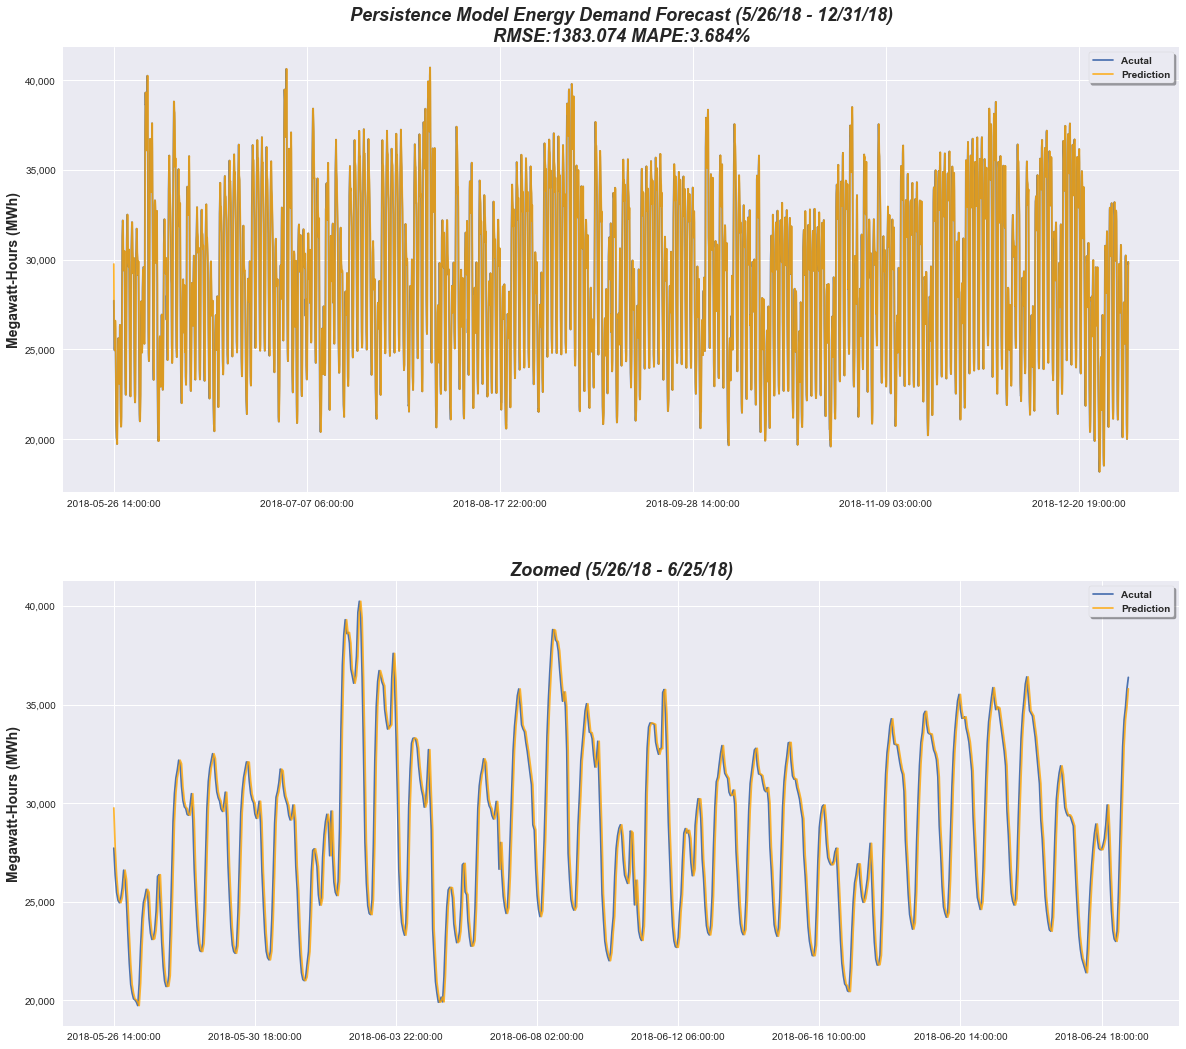

In [47]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/Base_Model_Demand_Predictions.png', height=700, width=1400)

A persistence model is generally a very good model when predicting hourly data. Each time step has a high correlation to the previous time step, thus the nice fit we see here.The key drawback to this type of model is that we are always an hour behind demand, leaving us some room for improvement.

## Univariate Deep Learning LSTM Model

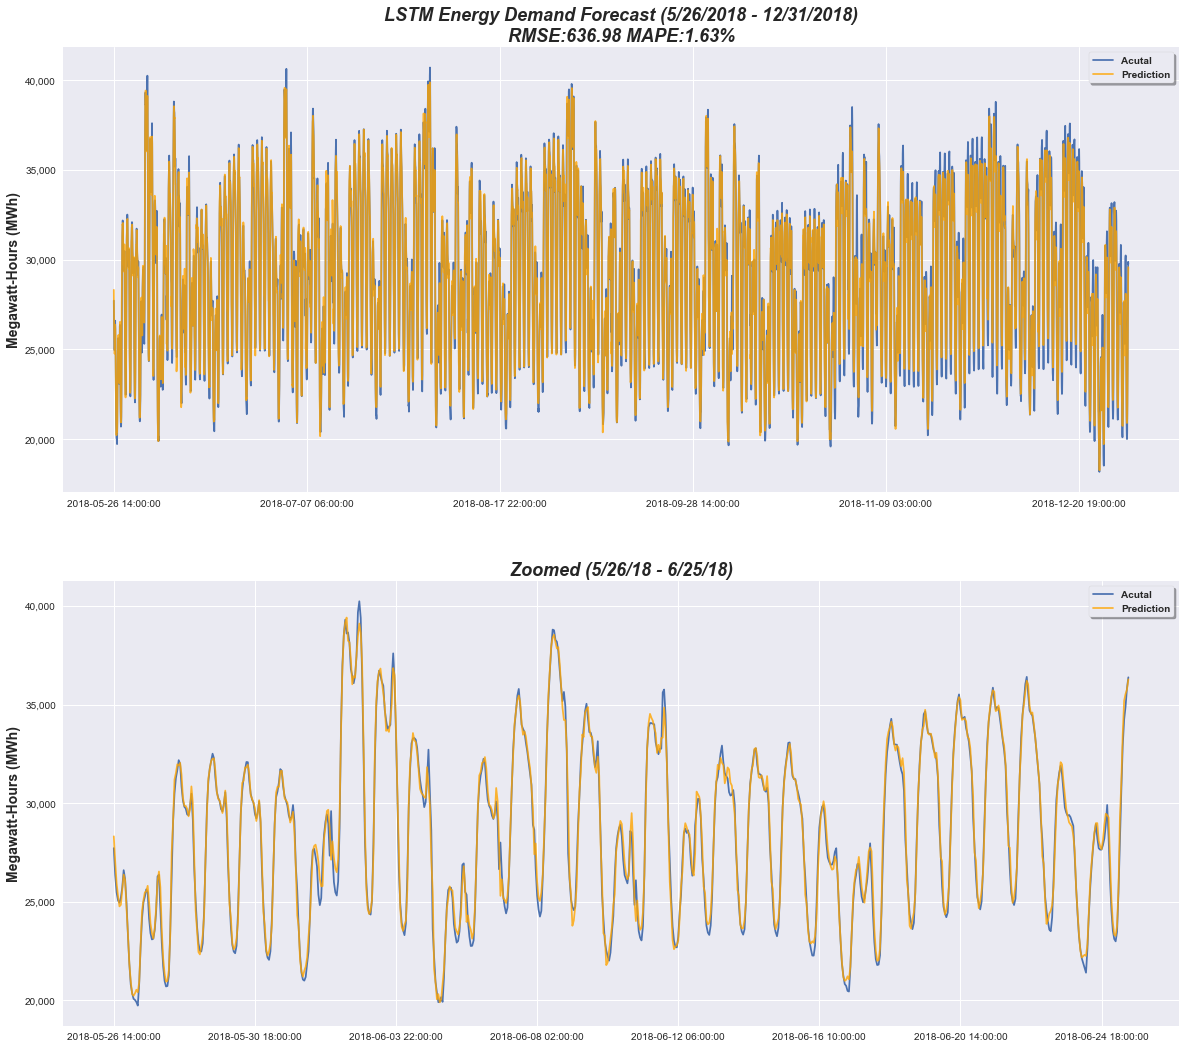

In [48]:
#Read in XGBR_Cost_Predictions model
Image(filename= model_viz + '/LSTM_Demand_Predictions.png', height=700, width=1400)

## Decision Recommendations - Improving energy production efficiency and ushering more green technology

I was able to improve model performance from the persistence model by 44.2%. The main benefit to this updated demand model is that we now have a much better understanding when peak power demand will arrive and end, allowing us to leverage this information to use more green(and generally less efficient) tech during hours of lower demand. 

Perhaps if there is a benefit to investing in green energy production techniques(or an incentive in place from the governmetn), we'll be able to nicely forecast demand to ensure 

# Conclusion

## Final Takeaways


This has multiple remifications for the company assides from being better able to predict hourly costs to meet consumer demand. Because our model is multivariate, it can incorporate changes to energy prodocution costs fairly easily as well as any changes to consumer behavior(such as increase in energy demand in 2019). 

Since we are able to better predict our costs in relation to demands, we are able to avoid the problem of over production of energy

## Thoughts for future research

This was a very interesting analysis to do overall. Though the data did not contain too many features, the data was very rich in  information that I was thrilled to find. If I were to conduct future research, I would like to collect the following pieces of information from customers:
- Unit type(apartment unit/house/office building, etc.)
- City location
- Age and profession of consumer

These features would be helpful in better understaning patterns of behaviors in our consumer groups. There would definetly be more consumer profiles we could find of interest to better gauge different ideas for consumer rebate programs

Applications for future research
- Would working from home reduce energy costs?
- Implement A/B test with a rebate program to encourage users to use energy efficient bulbs/turn off not in use appliacnce. ex) if you cut your monthly bill by X amount, you get Y rebate